In [1]:
# Library
import pandas as pd
import matplotlib.pyplot as plt
import datetime as dt
import numpy as np
import scipy.stats
from sklearn.metrics import mean_squared_error
from math import sqrt
import os
from os import listdir
from datetime import datetime
import pandas as pd
from matplotlib.dates import DateFormatter
import matplotlib.ticker as ticker
import matplotlib.dates as mdates
from sklearn.linear_model import LinearRegression
import seaborn as sns


## Matriz de correlacion

In [4]:
data = pd.read_csv("D:/Josefina/Proyectos/ProyectoChile/BA/proceed/merge_tot/BA_merge_comp.csv")

data.info() #Devuelve información número de filas, número de columnas, índices, tipo de objeto de cada columna
# data_satelital
#--- Fromato date
data["date"] = data["date"].apply(lambda x: datetime.strptime(x,"%Y-%m-%d"))

# #Seteamos con index a la columna date_hour
data.set_index('date', inplace = True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3456 entries, 0 to 3455
Data columns (total 47 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0     3456 non-null   int64  
 1   X              3456 non-null   int64  
 2   ID             3456 non-null   int64  
 3   date           3456 non-null   object 
 4   estacion       3456 non-null   object 
 5   PM25           3456 non-null   float64
 6   PM25_hora      3456 non-null   float64
 7   AOD_055        3456 non-null   float64
 8   ndvi           3456 non-null   float64
 9   BCSMASS_dia    3456 non-null   float64
 10  DUSMASS_dia    3456 non-null   float64
 11  DUSMASS25_dia  3456 non-null   float64
 12  OCSMASS_dia    3456 non-null   float64
 13  SO2SMASS_dia   3456 non-null   float64
 14  SO4SMASS_dia   3456 non-null   float64
 15  SSSMASS_dia    3456 non-null   float64
 16  SSSMASS25_dia  3456 non-null   float64
 17  blh_mean       3456 non-null   float64
 18  blh_min 

In [5]:
data_hora = data[['PM25', 'AOD_055', 'ndvi', #'LandCover',
       'BCSMASS_dia',  'DUSMASS_dia', 'OCSMASS_dia', 'SO2SMASS_dia',#'DUSMASS25_dia' 'SSSMASS25_dia', 'DMSSMASS_dia',
       'SO4SMASS_dia', 'SSSMASS_dia', 
        #'BCSMASS_dia', 'DMSSMASS_dia', 'DUSMASS_dia', 'DUSMASS25_dia', 'OCSMASS_dia', 'SO2SMASS_dia',
       #'SO4SMASS_dia', 'SSSMASS_dia', 'SSSMASS25_dia', 
       'blh_mean', #'blh_min','blh_max', 'blh_sd', 'blh_mean_subt',
        'sp_mean', #'sp_min', 'sp_max', 'sp_sd', 'sp_mean_subt', 
        'd2m_mean', #'d2m_min', 'd2m_max', 'd2m_sd','d2m_mean_subt', 
        't2m_mean', #'t2m_min', 't2m_max', 't2m_sd','t2m_mean_subt',
        'v10_mean', #'v10_min', 'v10_max', 'v10_sd','v10_mean_subt', 
        'u10_mean', #'u10_min', 'u10_max', 'u10_sd','u10_mean_subt',
        'tp_mean',# 'tp_min', 'tp_max', 'tp_sd', 'tp_mean_subt',
       'DEM','dayWeek']]

data_hora
# Cambiamos nombre de las columnas
data_hora.columns = [
    'PM2.5', 'AOD550', 'NDVI', 
    'BCSMASS', 'DUSMASS', 'OCSMASS', 'SO2SMASS', 
    'SO4SMASS', 'SSSMASS',
    'blh', 
    'sp', 
    'd2m', 
    't2m', 
    'v10', 
    'u10', 
    'tp',
    'DEM','dayWeek'
]

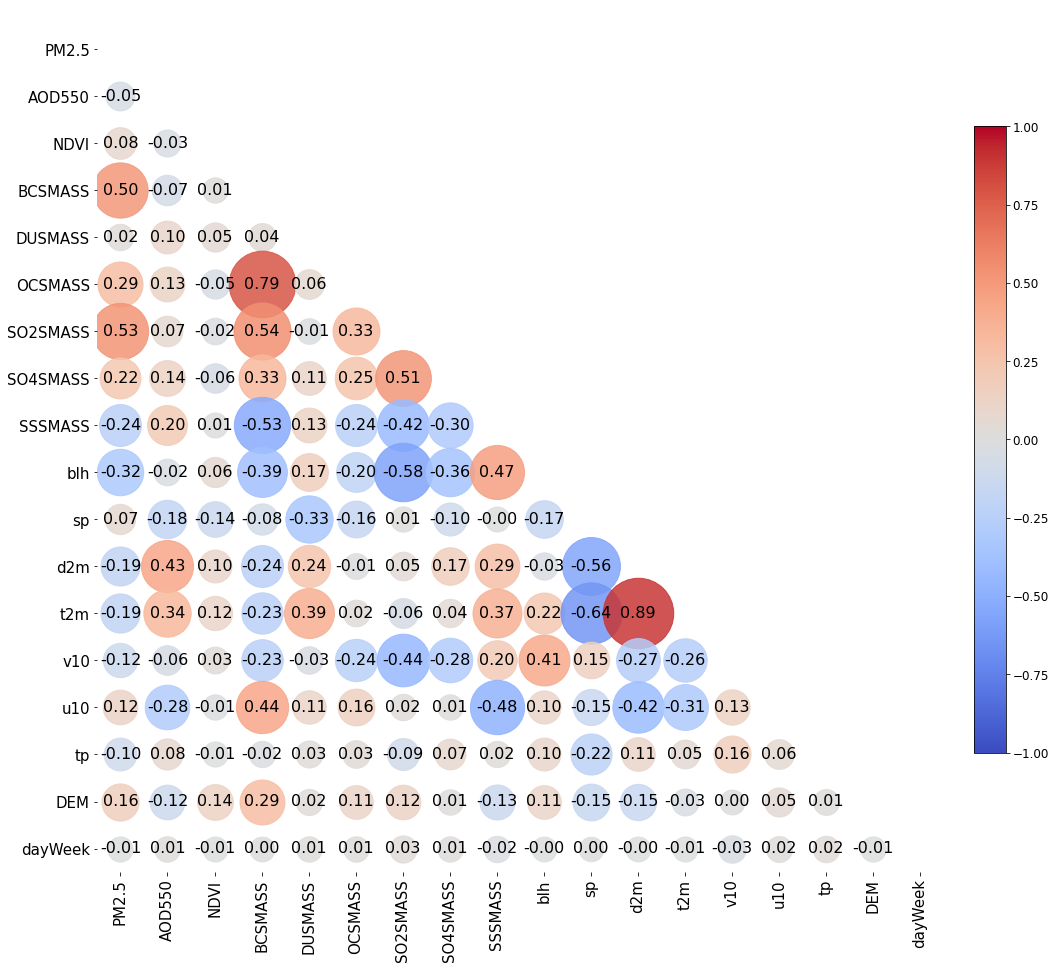

In [6]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Calcular matriz de correlación
corr = data_hora.corr()

# Crear figura
fig, ax = plt.subplots(figsize=(16, 14))

labels = corr.columns
n = len(labels)

# Tamaño de los círculos
max_circle_size = 5500
min_circle_size = 600

# Colormap
cmap = plt.cm.coolwarm

# Dibujar mitad inferior
for i in range(n):
    for j in range(n):
        if i > j:
            val = corr.iloc[i, j]
            color = cmap((val + 1) / 2)
            size = np.abs(val) * (max_circle_size - min_circle_size) + min_circle_size
            ax.scatter(j, i, s=size, color=color, alpha=0.85)
            ax.text(j, i, f"{val:.2f}", ha='center', va='center', fontsize=16, color='black')

# Etiquetas
ax.set_xticks(np.arange(n))
ax.set_yticks(np.arange(n))
ax.set_xticklabels(labels, rotation=90, fontsize=15)
ax.set_yticklabels(labels, fontsize=15)

# Ajustes visuales
ax.set_xlim(-0.5, n - 0.5)
ax.set_ylim(-0.9, n - 0.5)
ax.invert_yaxis()
ax.set_aspect('equal')

# Ocultar bordes
for spine in ax.spines.values():
    spine.set_visible(False)

# Colorbar
sm = plt.cm.ScalarMappable(cmap=cmap, norm=plt.Normalize(vmin=-1, vmax=1))
sm.set_array([])
cbar = plt.colorbar(sm, ax=ax, shrink=0.7, pad=0.03)
cbar.ax.tick_params(labelsize=12)
# cbar.set_label('Correlación', fontsize=14)

# Título
# plt.title("Matriz de correlación (mitad inferior con círculos)", fontsize=20)

plt.tight_layout(pad=1.5)
plt.show()
